In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
import tensorflow_hub as tf_hub
import PIL

from matplotlib import gridspec

In [2]:
def load_image(image_path, image_size=(3400, 2850)):
    img = tf.io.decode_image(
        tf.io.read_file(image_path),
        channels=3, dtype=tf.float32)[tf.newaxis, ...]
    img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
    return img

In [3]:
def visualize(images, titles=('',)):
    noi = len(images)
    image_sizes = [image.shape[1] for image in images]
    w = (image_sizes[0]*6) // 330
    plt.figure(figsize=(w * noi, w))
    grid_look = gridspec.GridSpec(1, noi, width_ratios=image_sizes)
    
    for i in range(noi):
        plt.subplot(grid_look[i])
        plt.imshow(images[i][0], aspect='equal')
        plt.axis('off')
        plt.title(titles[i])
        plt.savefig("final.jpg")
        
plt.show()

In [4]:
original_image = load_image("original.jpg")
style_image = load_image("style3.jpg")

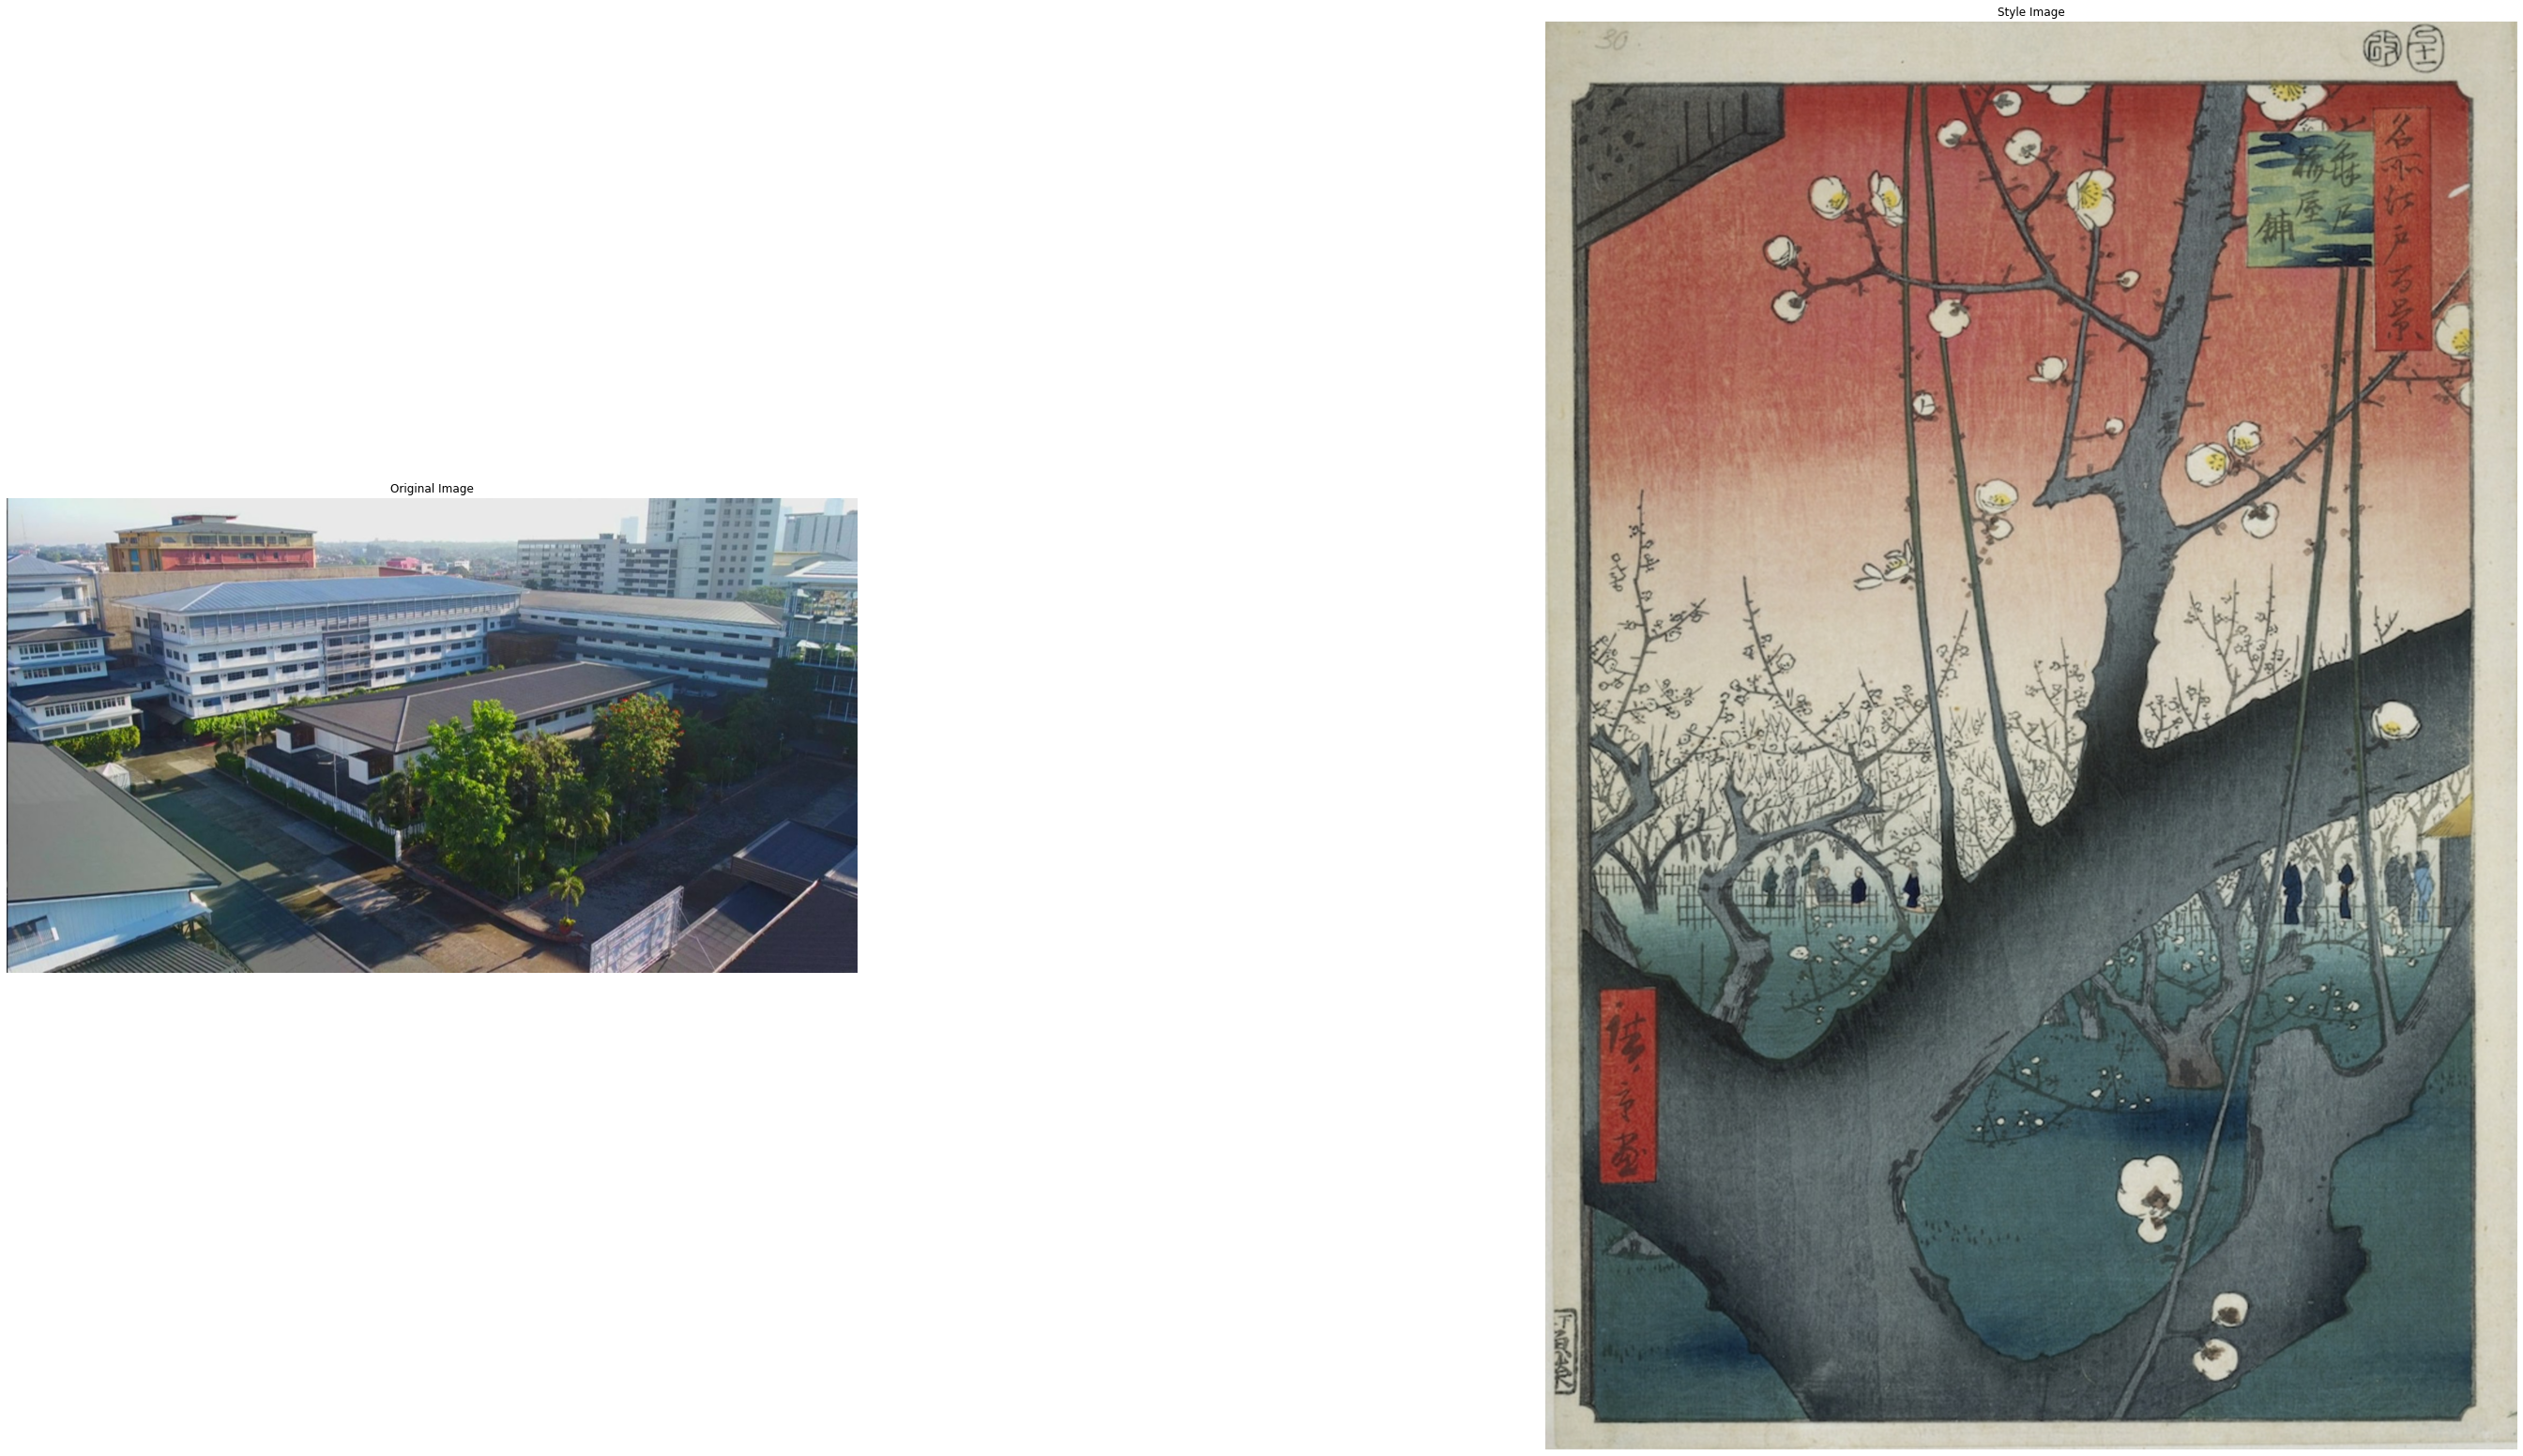

In [5]:
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1],
                            padding='VALID')

visualize([original_image, style_image], ['Original Image', 'Style Image'])

In [6]:
stylize_model = tf_hub.load('tf_model')

In [7]:
results = stylize_model(tf.constant(original_image),
                       tf.constant(style_image))

stylized_image = results[0]

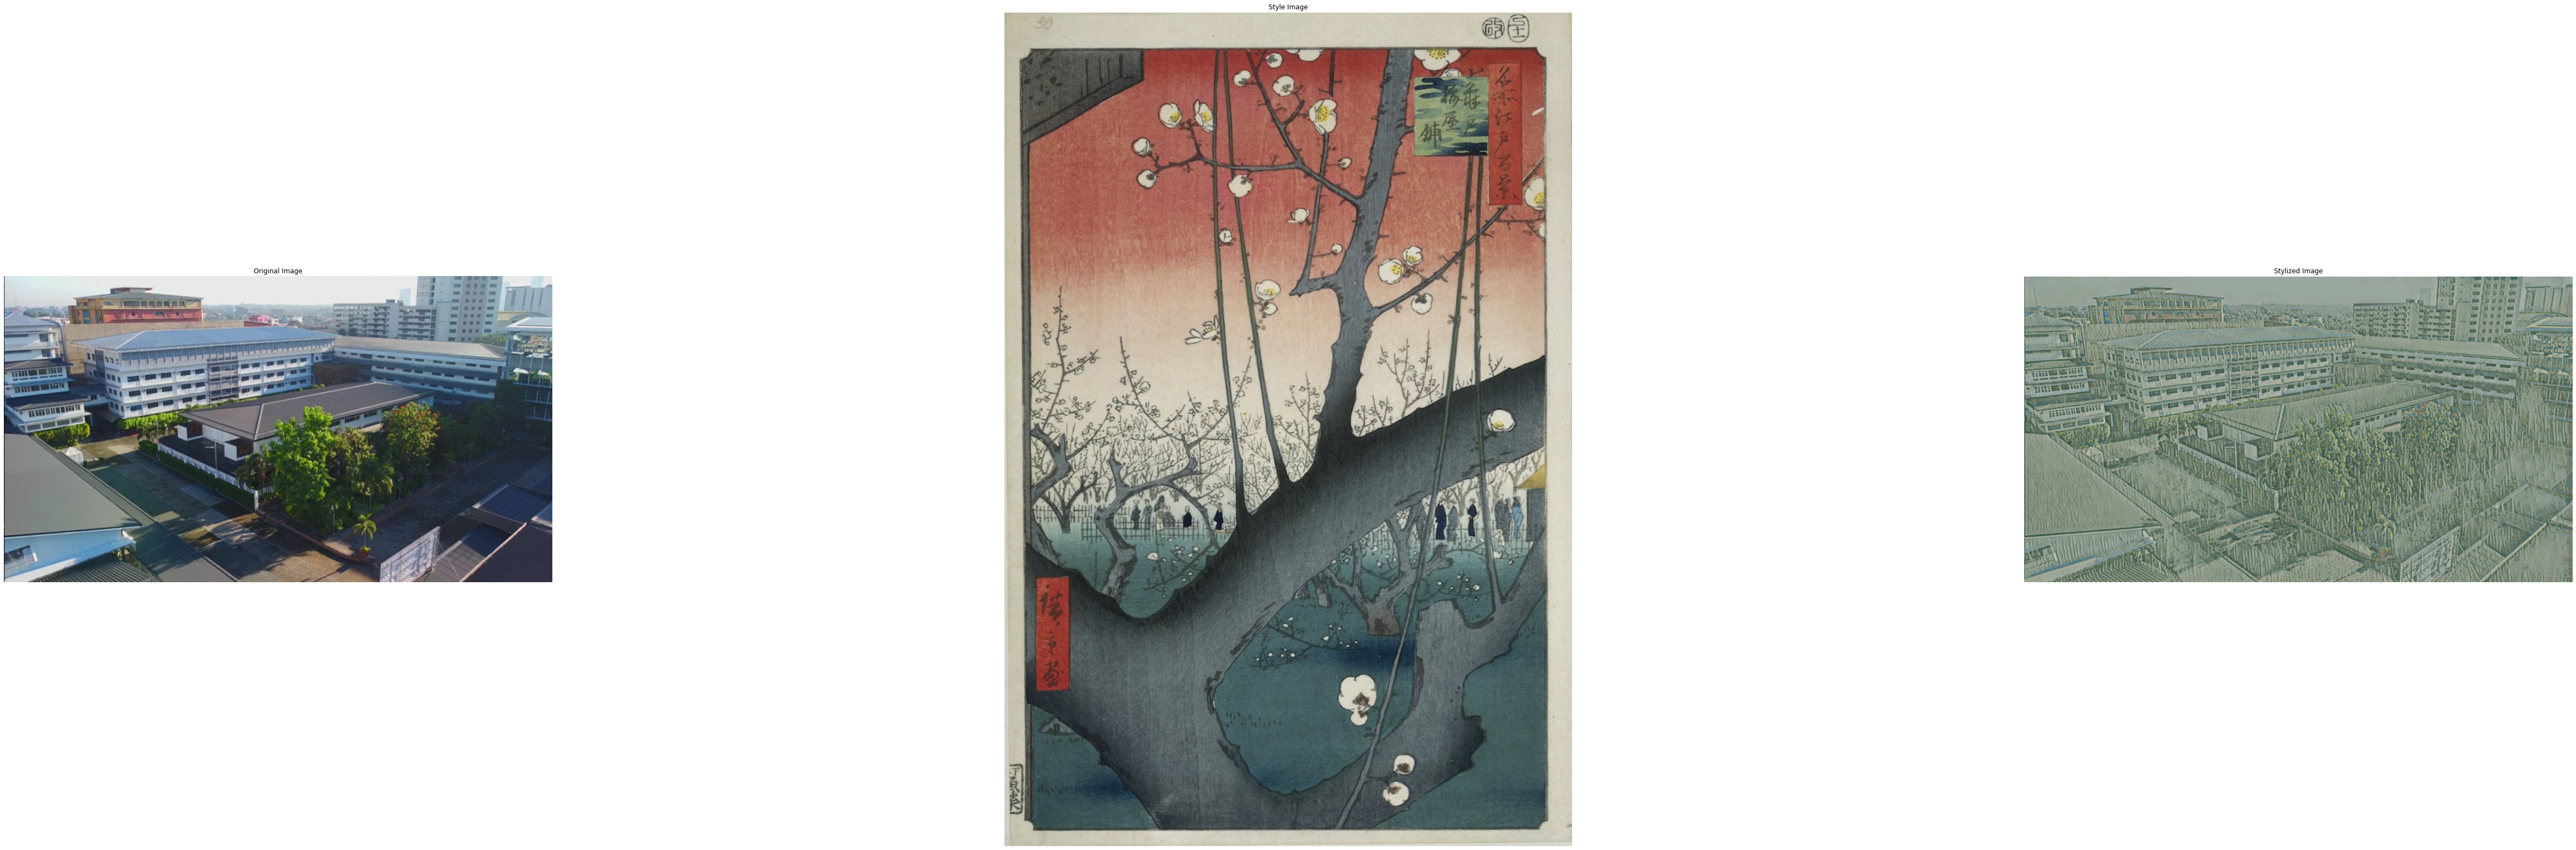

In [8]:
visualize([original_image, style_image, stylized_image], titles=['Original Image', 'Style Image', 'Stylized Image'])

In [9]:
def export_image(tf_img):
    tf_img = tf_img*255
    tf_img = np.array(tf_img, dtype=np.uint8)
    if np.ndim(tf_img)>3:
        assert tf_img.shape[0] == 1
        img = tf_img[0]
    return PIL.Image.fromarray(img)

In [10]:
export_image(stylized_image).save("final_result.png")